Get the accuracy metrics associated to a  (218776, 59, 1) prediction

In [44]:
import pickle
import os
import numpy as np
import pandas as pd

# Assuming the script is located in the same directory as the 'results' folder
folder_path = os.path.join('CRN', 'results')
file_name = 'new_cancer_sim_2_2.p'

path = os.path.join(folder_path, file_name)

with open(path, 'rb') as f:
    results = pickle.load(f)

In [45]:
# read npy tile
tile = np.load('CRN\predictions_CRN.npy')
tile.shape

(218776, 59, 1)

In [46]:
results['test_data']['cancer_volume'].shape

(218776, 60)

In [47]:
results['test_data']['sequence_lengths']

array([ 1.,  1.,  1., ..., 59., 59., 59.])

In [48]:
# TODO: add counterfactuals benchmaring
# We just do the accuracy at each timestep and then we average the accuracy over all the timesteps

tests_num = len(results['test_data']['sequence_lengths']) // 4
assert len(results['test_data']['sequence_lengths']) % 4 == 0
right_answers = 0

y_predicted_list = []
y_true_list = []

for i in range(0, tests_num*4 , 4):
    assert results['test_data']['sequence_lengths'][i] == results['test_data']['sequence_lengths'][i+1]
    assert results['test_data']['sequence_lengths'][i] == results['test_data']['sequence_lengths'][i+2]
    assert results['test_data']['sequence_lengths'][i] == results['test_data']['sequence_lengths'][i+3]

    sequence_length = int(results['test_data']['sequence_lengths'][i])
    
    if sequence_length != 59:
        y_predicted = [tile[i][sequence_length], tile[i+1][sequence_length], tile[i+2][sequence_length], tile[i+3][sequence_length]]
        min_predicted_index = np.argmin(y_predicted)

        # get the index of the true min value
        y_true = [results['test_data']['cancer_volume'][i][sequence_length], results['test_data']['cancer_volume'][i+1][sequence_length], 
                results['test_data']['cancer_volume'][i+2][sequence_length], results['test_data']['cancer_volume'][i+3][sequence_length]]
        min_true_index = np.argmin(y_true)

        y_predicted_list.append(min_predicted_index)
        y_true_list.append(min_true_index)

        if min_predicted_index == min_true_index:
            right_answers += 1



y_predicted_list = np.array(y_predicted_list)
y_true_list = np.array(y_true_list)

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
print('accuracy: ', accuracy_score(y_true_list, y_predicted_list))

# precision, recall, f1-score, support
from sklearn.metrics import classification_report
print(classification_report(y_true_list, y_predicted_list))



confusion_matrix(y_true_list, y_predicted_list)



accuracy:  0.8235676720373158
              precision    recall  f1-score   support

           0       0.67      0.82      0.74      5216
           1       0.00      0.00      0.00         0
           2       0.00      0.69      0.00        13
           3       0.98      0.82      0.89     48582

    accuracy                           0.82     53811
   macro avg       0.41      0.58      0.41     53811
weighted avg       0.95      0.82      0.88     53811



c:\Users\idormoy\anaconda3\envs\RA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\idormoy\anaconda3\envs\RA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\idormoy\anaconda3\envs\RA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 4262,    10,     0,   944],
       [    0,     0,     0,     0],
       [    4,     0,     9,     0],
       [ 2079,    52,  6405, 40046]], dtype=int64)

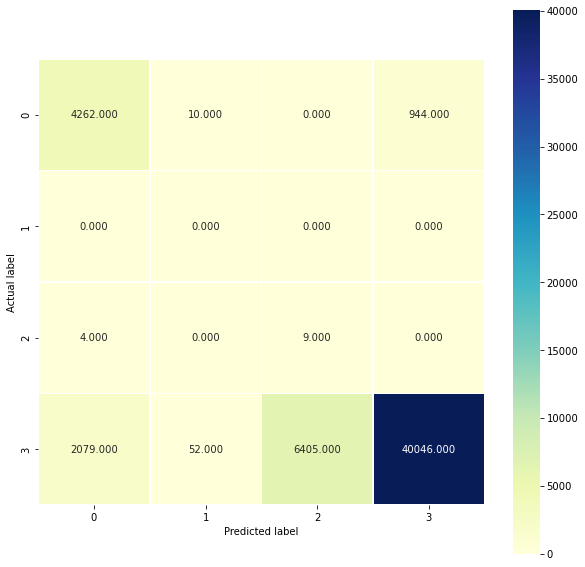

In [52]:
# plot the confusion matrix with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have defined y_true_list and y_predicted_list

cm = confusion_matrix(y_true_list, y_predicted_list)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='YlGnBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



c:\Users\idormoy\anaconda3\envs\RA\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


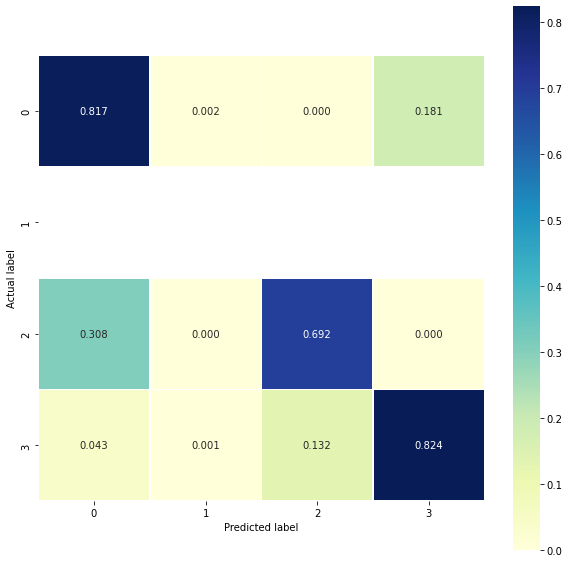

In [53]:
# plot the normalized confusion matrix with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have defined y_true_list and y_predicted_list

cm = confusion_matrix(y_true_list, y_predicted_list)

# Calculate row-wise normalization
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 10))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='YlGnBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


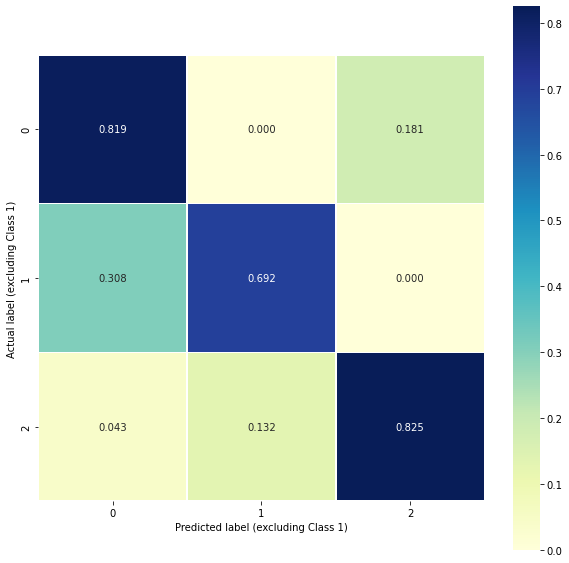

In [54]:
# plot the normalized confusion matrix excluding class 1 with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have defined y_true_list and y_predicted_list

# Example confusion matrix
cm = confusion_matrix(y_true_list, y_predicted_list)

# Remove the row and column corresponding to class 1
class_to_exclude = 1
cm = np.delete(cm, class_to_exclude, axis=0)
cm = np.delete(cm, class_to_exclude, axis=1)

# Calculate row-wise normalization
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 10))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='YlGnBu')
plt.ylabel('Actual label (excluding Class 1)')
plt.xlabel('Predicted label (excluding Class 1)')
plt.show()


# Matplotlib 

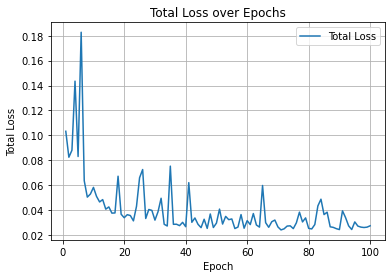

In [68]:
import matplotlib.pyplot as plt

# Extract the epoch numbers and total loss values from the provided information
epochs = list(range(1, 101))
total_loss_values = [
    0.10331153124570847, 0.08250243216753006, 0.08809689432382584, 0.14353670179843903,
    0.08308645337820053, 0.18277496099472046, 0.06362233310937881, 0.05050759017467499,
    0.05295522138476372, 0.058314595371484756, 0.051063794642686844, 0.0466156080365181,
    0.048504024744033813, 0.04085033759474754, 0.04262843728065491, 0.03764691576361656,
    0.03779543936252594, 0.06727433204650879, 0.036768436431884766, 0.03395995870232582,
    0.03640624135732651, 0.03570239618420601, 0.03144273906946182, 0.043120309710502625,
    0.06605865806341171, 0.07262971997261047, 0.0333598330616951, 0.04056721180677414,
    0.03985137119889259, 0.032030511647462845, 0.03876810148358345, 0.04958555847406387,
    0.02870272658765316, 0.027326803654432297, 0.07535456120967865, 0.02868623659014702,
    0.028755048289895058, 0.02762695774435997, 0.03025750443339348, 0.02676268108189106,
    0.062111057341098785, 0.030292725190520287, 0.033779844641685486, 0.02871011197566986,
    0.02600613795220852, 0.032744280993938446, 0.025409353896975517, 0.036971211433410645,
    0.026114502921700478, 0.029643455520272255, 0.04088353365659714, 0.02888592891395092,
    0.03503895923495293, 0.03239970654249191, 0.03298370912671089, 0.02528982050716877,
    0.026469487696886063, 0.03648705035448074, 0.025546060875058174, 0.03161293640732765,
    0.028477540239691734, 0.03730778023600578, 0.028152965009212494, 0.026424914598464966,
    0.05984118580818176, 0.030016757547855377, 0.026292094960808754, 0.030749596655368805,
    0.03209253028035164, 0.026579629629850388, 0.024182263761758804, 0.025041336193680763,
    0.02726837433874607, 0.02746090665459633, 0.02523387223482132, 0.029869921505451202,
    0.03844735398888588, 0.03059479594230652, 0.03381602466106415, 0.0254143625497818,
    0.024981660768389702, 0.02849910408258438, 0.04345708340406418, 0.04882882907986641,
    0.03648889437317848, 0.03841150924563408, 0.026681074872612953, 0.026221727952361107,
    0.025189511477947235, 0.024451134726405144, 0.03950991854071617, 0.034065522253513336,
    0.027450865134596825, 0.024496082216501236, 0.030606701970100403, 0.02725970558822155,
    0.026429902762174606, 0.02612069435417652, 0.026415718719363213, 0.027501661330461502
]

# Plotting the total loss
plt.plot(epochs, total_loss_values, label='Total Loss')
plt.title('Total Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.legend()
plt.grid(True)



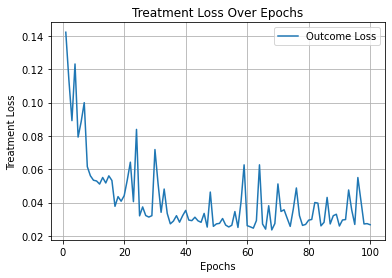

In [70]:
import matplotlib.pyplot as plt

# Extracting loss values from the provided data
epochs = list(range(1, 101))
total_loss = [1.3694782257080078, 1.3391715288162231, 1.3136162757873535, 1.347440242767334, 1.3055227994918823,
              1.3131213188171387, 1.32341730594635, 1.2844711542129517, 1.2805489301681519, 1.277651309967041,
              1.2776358127593994, 1.2741156816482544, 1.2788482904434204, 1.2751861810684204, 1.2799073457717896,
              1.2776029109954834, 1.2616766691207886, 1.2681330442428589, 1.2645106315612793, 1.268227219581604,
              1.2765872478485107, 1.2879797220230103, 1.2638187408447266, 1.307422399520874, 1.255908727645874,
              1.261443018913269, 1.2554562091827393, 1.2547229528427124, 1.2556264400482178, 1.2969844341278076,
              1.2756319046020508, 1.2571431398391724, 1.2721225023269653, 1.2573208808898926, 1.2507472038269043,
              1.252681851387024, 1.2556614875793457, 1.2596874237060547, 1.2570350170135498, 1.2540638446807861,
              1.270499348640442, 1.2659447193145752, 1.2595529556274414, 1.2562990188598633, 1.2571076154708862,
              1.2625350952148438, 1.2528917789459229, 1.2737759351730347, 1.2519481182098389, 1.2532919645309448,
              1.2531275749206543, 1.2553892135620117, 1.252598762512207, 1.2519322633743286, 1.2524274587631226,
              1.260263442993164, 1.250664234161377, 1.2737791538238525, 1.2961134910583496, 1.2522176504135132,
              1.2519710063934326, 1.2499490976333618, 1.2591972351074219, 1.2881591320037842, 1.2552293539047241,
              1.251184105873108, 1.2655023336410522, 1.2500088214874268, 1.2554044723510742, 1.2823840379714966,
              1.2596303224563599, 1.2626490592956543, 1.2579936981201172, 1.2516117095947266, 1.2630029916763306,
              1.2747371196746826, 1.2572869062423706, 1.252050518989563, 1.2524601221084595, 1.2549306154251099,
              1.2535343170166016, 1.2648406028747559, 1.2647452354431152, 1.252297282218933, 1.2536449432373047,
              1.2674132585525513, 1.252066969871521, 1.2589503526687622, 1.2604165077209473, 1.2518084049224854,
              1.255052924156189, 1.254993200302124, 1.2708477973937988, 1.2609057426452637, 1.2527127265930176,
              1.2764874696731567, 1.2637962102890015, 1.251114845275879, 1.2513679265975952, 1.250361680984497]

outcome_loss = [0.14216482639312744, 0.11373751610517502, 0.08915570378303528, 0.12313500791788101, 0.07929112762212753,
                0.08848806470632553, 0.09994587302207947, 0.06154855340719223, 0.05610625445842743, 0.05342932790517807,
                0.05297776684165001, 0.05111377686262131, 0.055058661848306656, 0.051779523491859436, 0.05606168136000633,
                0.053254563361406326, 0.0377768948674202, 0.04358743503689766, 0.04083333536982536, 0.04419420287013054,
                0.053587064146995544, 0.06424352526664734, 0.04058271646499634, 0.0839032530784607, 0.03207351639866829,
                0.03741041198372841, 0.032250791788101196, 0.0313272550702095, 0.03216371685266495, 0.07181800901889801,
                0.05165306478738785, 0.0341903455555439, 0.0481342114508152, 0.03348872438073158, 0.027272719889879227,
                0.028923675417900085, 0.032145287841558456, 0.028273489326238632, 0.032145287841558456, 0.03534385561943054,
                0.029536481946706772, 0.029194219037890434, 0.03124135173857212, 0.029078705236315727, 0.02819927968084812,
                0.03352098998403549, 0.025324502274513245, 0.04632715803337097, 0.02576096832728386, 0.027249959632754326,
                0.027553064450979233, 0.030466262683033943, 0.026529110446691513, 0.025388778030872345, 0.026417208641409874,
                0.03464224913740158, 0.02510487176477909, 0.04052266454696655, 0.0626423504357338, 0.02617649309372902,
                0.025481073647856712, 0.024683480158805847, 0.02920874519634247, 0.06265774369239807, 0.02716068360221386,
                0.02409222283911705, 0.0381229599711895, 0.023625928208470345, 0.027426719516515732, 0.051198702514886856,
                0.034692462503671646, 0.035717211812496185, 0.030650217831611633, 0.02574330186843872, 0.036179080426454544,
                0.048783812463998795, 0.032227784633636475, 0.02634563320851326, 0.02692091602063179, 0.029476993843078613,
                0.029903926879882812, 0.04005291390442848, 0.039679080545663834, 0.02606473781144619, 0.02819304756808281,
                0.0431152589328289, 0.027213744744062424, 0.032132558494091034, 0.03301992213797569, 0.025967646166086197,
                0.029574284836173058, 0.029833331927537918, 0.04758010095334053, 0.035578988909721375, 0.026916719853520393,
                0.055035863310813904, 0.04114453521323204, 0.027198013901114464, 0.02740012812650299, 0.026737035781383514]

treatment_loss_values = [
    1.2273133993148804, 1.2254340648651123, 1.2244606018066406, 1.224305272102356,
    1.2262316942214966, 1.2246332168579102, 1.2234714031219482, 1.2229225635528564,
    1.224442720413208, 1.22422194480896, 1.2246580123901367, 1.2230019569396973,
    1.2237895727157593, 1.2234066724777222, 1.2238457202911377, 1.2243483066558838,
    1.2238997220993042, 1.2245455980300903, 1.2236772775650024, 1.224032998085022,
    1.223000168800354, 1.2237361669540405, 1.223236083984375, 1.223519206047058,
    1.2238352298736572, 1.2240326404571533, 1.2232054471969604, 1.2233957052230835,
    1.223462700843811, 1.2251664400100708, 1.223978877067566, 1.2229528427124023,
    1.2239882946014404, 1.223832130432129, 1.2234745025634766, 1.2237582206726074,
    1.2235162258148193, 1.2238792181015015, 1.2235616445541382, 1.2238177061080933,
    1.2234749794006348, 1.2235521078109741, 1.2239573001861572, 1.224380373954773,
    1.224698781967163, 1.2234480381011963, 1.2240614891052246, 1.2241201400756836,
    1.2237554788589478, 1.223462700843811, 1.2237329483032227, 1.2237329483032227,
    1.2237541675567627, 1.224393606185913, 1.2241065502166748, 1.2240092754364014,
    1.2243247032165527, 1.2237910032272339, 1.2239253520965576, 1.2242939472198486,
    1.223996639251709, 1.224179744720459, 1.2241547107696533, 1.223939061164856,
    1.2239121198654175, 1.223641037940979, 1.2239899635314941, 1.2241677045822144,
    1.224158763885498, 1.224159836769104, 1.2239935398101807, 1.224256157875061,
    1.2240464687347412, 1.223832607269287, 1.224431037902832, 1.2244304418563843,
    1.2243162393569946, 1.2244199514389038, 1.2244075536727905, 1.2245062589645386,
    1.2244868278503418, 1.2246925830841064, 1.22471284866333, 1.2243925333023071,
    1.2246425151824951, 1.224462866783142, 1.224461555480957, 1.2244969606399536,
    1.2246367931365967, 1.2247240543365479, 1.2247613668441772, 1.2245906591415405,
    1.2246617078781128, 1.224711537361145, 1.2246721982955933, 1.2247956991195679,
    1.224683165550232, 1.2247706651687622, 1.2249188423156738, 1.2249015560150146,
]

# Plotting the treatment loss
# plt.plot(epochs, treatment_loss_values, label='Treatment Loss')
plt.plot(epochs, outcome_loss, label='Outcome Loss')
# plt.plot(epochs, total_loss, label='Total Loss')
plt.title('Treatment Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Treatment Loss')
plt.legend()
plt.grid(True)

plt.show()

